In [1]:
%cd ..

/home/tianshu/Documents/dart


In [2]:
from dart.dataset import load_arrays
import h5py
import numpy as np


DATASET = "data/wiselab-2/data.mat"

data = load_arrays(DATASET)

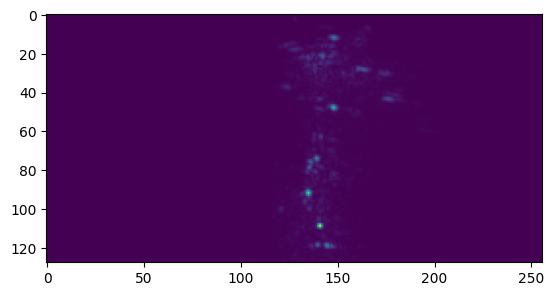

In [13]:
from matplotlib import pyplot as plt
plt.imshow(data['rad'][110, ..., 1])

In [ ]:
data["rad"] = (data["rad"] / np.max(data["rad"]) * 65504).astype(np.float16)
with h5py.File(DATASET, 'w') as hf:
    for k, v in data.items():
        hf.create_dataset(k, data=v)
    hf.close()

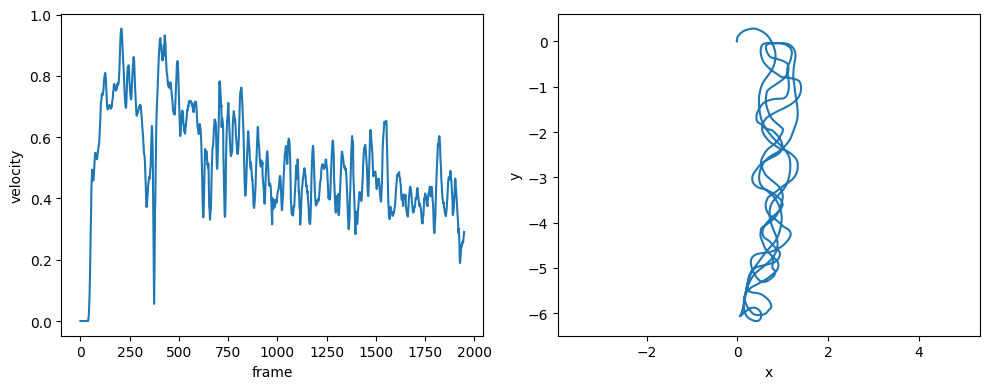

In [4]:
from matplotlib import pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(np.linalg.norm(data["vel"], axis=1))
axs[1].plot(data["pos"][:, 0], data["pos"][:, 1])
axs[1].axis('equal')

axs[0].set_xlabel("frame")
axs[0].set_ylabel("velocity")
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")

fig.tight_layout()